### Importing Needed Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import stats 
from scipy.stats import pearsonr
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

### Loading Dataset

In [2]:
#loading dataset
cancer = pd.read_csv('cancer.data', header = None)
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Cleaning data

In [3]:
#Viewing data length
cancer.shape

(699, 11)

In [4]:
#Viewing data information
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
#checking duplicates
cancer.nunique()

0     645
1      10
2      10
3      10
4      10
5      10
6      11
7      10
8      10
9       9
10      2
dtype: int64

In [6]:
#Renaming columns
cancer = cancer.rename(columns = {0 : "ID", 1 : "Clump Thickness", 
                                  2 : "Uniformity of Cell Size",
                                  3 : "Uniformity of Cell Shape",
                                  4 : "Marginal Adhesion",
                                  5 : "Single Epithelial Cell Size",
                                  6 : "Bare Nuclei", 7 : "Bland Chromatin",
                                  8 : "Normal Nucleoli", 9 : "Mitoses",
                                  10 : "Class"})
cancer.head(1)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2


In [7]:
#Checking missing values
cancer.isna().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [25]:
#Checking number of people in,benign,malignant and both
benign = cancer[cancer.Class == 2]
malignant = cancer[cancer.Class == 4]
both = benign + malignant
print("The number of people with both Benign and Malignant =",len(both))
print("The number of people with Benign =",len(benign))
print("The number of people with Malignant =",len(malignant))

The number of people with both Benign and Malignant = 699
The number of people with Benign = 458
The number of people with Malignant = 241


In [9]:
#Checking values in Bare nuclei
cancer["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
#checking data types in columns
print(cancer.columns.to_series().groupby(cancer.dtypes).groups)

#Counting value
print(cancer.dtypes.value_counts())

{dtype('int64'): Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Class'],
      dtype='object'), dtype('O'): Index(['Bare Nuclei'], dtype='object')}
int64     10
object     1
dtype: int64


In [11]:
#Replacing object type value with the most frequent value/mode and converting it as an integer
frequent = cancer["Bare Nuclei"].value_counts().index[0]
cancer["Bare Nuclei"]= cancer["Bare Nuclei"].replace("?", frequent).astype("int64")
cancer["Bare Nuclei"].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [12]:
#Checking if all columns are integers
cancer.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

* From the information above we can see that our Bare Nuclei column is concverted from string/onject to an integer. 

### EDA

In [13]:
#checking statistical summary
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


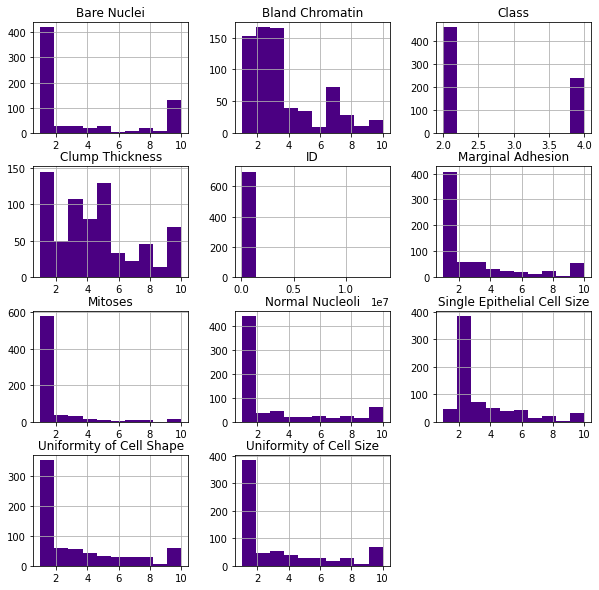

In [14]:
#Plotting a histogram
cancer.hist(figsize =(10, 10), color = "indigo")
_ = plt.show()

* Looking at our graphs we can see that Bland Chromattin,Clump Thickness,Marginal Adhension,Mitoses,Normal Nucleoli,Single epithelial Cell Size,Uniformity of Cell Shape and Uniformity of Cell Size are erightly skewed meaning that thetre is positivew relationship.
* ID has a weak negative relationship.
* Mitoses has a moderate positive relationship,the p value is more than 0 but less than 0.5.
* Single Epithelial Cell Size,Margin Adhesion,Clump Thickness,Normal Nucleoli,Bland Chromatin,uniformity of Cell Size and Uniformity of Cell Shape are strongly positively related because their correlation is more than 0.5.

In [15]:
#Viewing the correlation
cancer.corr()["Class"].sort_values(ascending = True)

ID                            -0.080226
Mitoses                        0.423170
Single Epithelial Cell Size    0.682785
Marginal Adhesion              0.696800
Normal Nucleoli                0.712244
Clump Thickness                0.716001
Bland Chromatin                0.756616
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Bare Nuclei                    0.818968
Class                          1.000000
Name: Class, dtype: float64

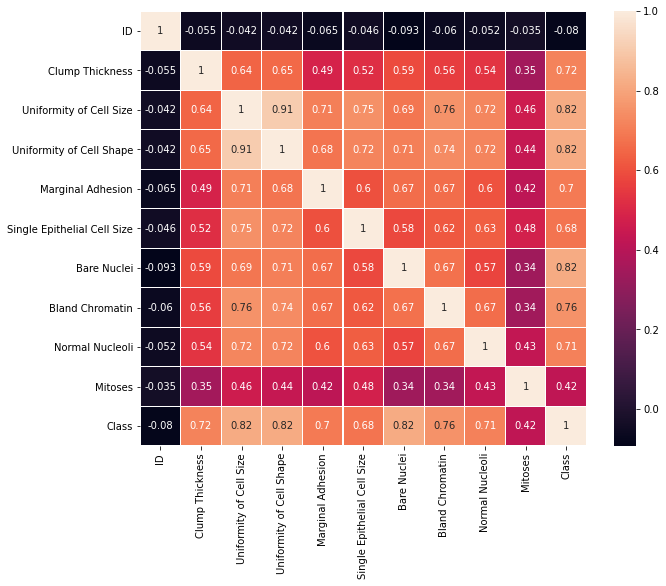

In [16]:
#Plotting a heatmap to veiw correlation
plt.figure(figsize=(10,8))
_= sns.heatmap(cancer.corr(), annot=True, linewidth=0.1)


In [17]:
#Creating targets
X = cancer.drop("Class", axis =1 )
y = cancer["Class"]

#Splittin dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

#Viewing Test and train lengths
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(524, 10) (524,) (175, 10) (175,)


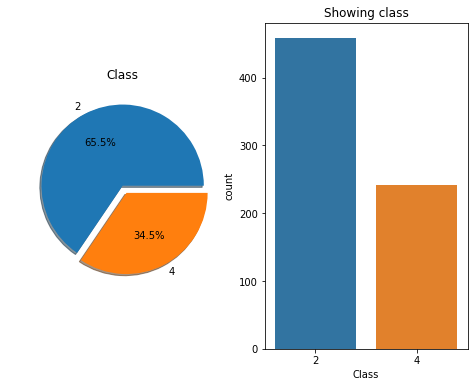

In [18]:
f,ax = plt.subplots(1,2,figsize=(8,6))
y.value_counts().plot.pie(explode = [0,0.1],
                                        autopct = '%1.1f%%',
                                        ax = ax[0],shadow = True)
ax[0].set_title("Class")
ax[0].set_ylabel(" ")
sns.countplot("Class", data = cancer, ax = ax[1])
ax[1].set_title("Showing class")
plt.show()

* From the above plots we can see that benign has more counts than malignant.
* 2 is the values for bening and it's good so it's given the numeric value 0.
* 4 is a value for malignant and it;s bad so it is represented by the numeric value 1.